# Santander_Product_Recommendation(2019.06.01)

___

In this competition, you are provided with 1.5 years of customers behavior data from Santander bank to predict what new products customers will purchase. The data starts at 2015-01-28 and has monthly records of products a customer has, such as "credit card", "savings account", etc. You will predict what additional products a customer will get in the last month, 2016-06-28, in addition to what they already have at 2016-05-28. These products are the columns named: ind_(xyz)_ult1, which are the columns #25 - #48 in the training data. You will predict what a customer will buy in addition to what they already had at 2016-05-28. 



참고 :

- https://www.kaggle.com/c/santander-product-recommendation
- 머신러닝 참고생활(책)
- kaggle kernels
    - https://www.kaggle.com/apryor6/detailed-cleaning-visualization-python
    - https://www.kaggle.com/alabsinatheer/comprehensive-exploration-and-visualization-1-1
    - 
    
___

## EDA

**[머신러닝 참고생활 43p 내용 중]** <br>


[Tip 2-2] 탐색적 자료 분석을 통해서 우리가 얻고자 하는 것은?

새로 접하는 데이터에 대한 첫 번째 탐색적 분석 과정에서 데이터의 모든 것을 이해하려고 부담스럽게 접근할 필요는 없다. <br>
필자의 경우에는 데이터의 일부 행을 랜덤하게 출력하여 눈으로 훑어보며 단계적으로 데이터에 익숙해지고자 한다. <br>
데이터에 대한 간단한 시각화도 데이터를 이해하는데 큰 도움이 된다. <br>
첫 번째 탐색적 데이터 분석을 통해서는

- 아, 이번 경진대회 데이터는 이렇게 생겼구나.
- 이러한 변수들이 존재하는구나.
- data type을 보니, 이 변수는 전처리를 수행해야겠다.

정도의 느낌을 갖는 것으로 충분하다.
___

In [141]:
import pandas as pd
import numpy as np
import os


import seaborn as sns
import matplotlib.pyplot as plt

In [142]:
train = pd.read_csv('train_ver2.csv', low_memory = False)

In [143]:
train.shape

(13647309, 48)

In [144]:
train.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [145]:
cols = list(train.columns)
for i in range(int(len(cols)/5)+1):
    print(cols[i*5:(5*i+5)])

['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo']
['age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel']
['ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext']
['conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov']
['nomprov', 'ind_actividad_cliente', 'renta', 'segmento', 'ind_ahor_fin_ult1']
['ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1']
['ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1']
['ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1']
['ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1']
['ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']


In [146]:
key = ['fecha_dato', 'ncodpers'] 

variable_list = ['ind_empleado','pais_residencia','sexo','age',
                 'fecha_alta','ind_nuevo','antiguedad','indrel',
                 'ult_fec_cli_1t','indrel_1mes','tiprel_1mes',
                 'indresi','indext','conyuemp','canal_entrada',
                 'indfall','tipodom','cod_prov','nomprov',
                 'ind_actividad_cliente','renta','segmento']

target_list = ['ind_ahor_fin_ult1','ind_aval_fin_ult1','ind_cco_fin_ult1','ind_cder_fin_ult1',
               'ind_cno_fin_ult1','ind_ctju_fin_ult1','ind_ctma_fin_ult1','ind_ctop_fin_ult1',
               'ind_ctpp_fin_ult1','ind_deco_fin_ult1','ind_deme_fin_ult1','ind_dela_fin_ult1',
               'ind_ecue_fin_ult1','ind_fond_fin_ult1','ind_hip_fin_ult1','ind_plan_fin_ult1',
               'ind_pres_fin_ult1','ind_reca_fin_ult1','ind_tjcr_fin_ult1','ind_valo_fin_ult1',
               'ind_viv_fin_ult1','ind_nomina_ult1','ind_nom_pens_ult1','ind_recibo_ult1']

___
- key
    - fecha_dato : 월별 날짜 데이터
    - ncodpers : 고객 고유번호
    
    

- variable_list 
    - ind_empleado : 고용 지표 (zero variance)
    - pais_residencia : 고객 거주 국가
    - sexo : 성별
    - age : 나이
    - fecha_alta : 고객이 은행과 첫 계약을 체결한 날짜
    - ind_nuevo : 신규고객여부(6개월 기준)
    - antigueded : 은행 거래 누적 기간(월단위)
    - indrel : 고객등급
    - ult_fec_cli_lt : 1등급 고객으로서 마지막 날짜
    - indrel_1mes : 월초기준 고객등급
    - tiprel_1mes : 월초기준 고객 관계 유형
    - indresi : 거주 지표
    - indext : 외국인 지표
    - conyuemp : 배우자 지표
    - canal_entrada : 고객 유입 채널
    - indfall : 고객 사망 여부
    - tipodom : 주소 유형 (zero variance)
    - cod_prov : 지방 코드 
    - nomprov : 지방 이름
    - ind_activated_cliente : 활성화 지표
    - renta : 가구 총 수입
    - segmento : 고객 분류 
    
    
- target_list
    - ind_ahor_fin_ult1 : 예금
    - ind_aval_fin_ult1 : 보증
    - ind_cco_fin_ult1 : 당좌예금
    - ind_cder_fin_ult1 : 파생 상품 계좌
    - ind_cno_fin_ult1 : 급여 계정
    - ind_ctju_fin_ult1 : 청소년 계정
    - ind_ctma_fin_ult1 : 마스 특별 계정
    - ind_ctop_fin_ult1 : 특정 계정
    - ind_ctpp_fin_ult1 : 특정 플러스 계정
    - ind_deco_fin_ult1 : 단기 예금
    - ind_deme_fin_ult1 : 중기 예금
    - ind_dela_fin_ult1 : 장기 예금
    - ind_ecue_fin_ult1 : e-계정
    - ind_fond_fin_ult1 : 펀드
    - ind_hip_fin_ult1 : 부동산 대출
    - ind_plan_fin_ult1 : 연금
    - ind_pres_fin_ult1 : 대출
    - ind_reca_fin_ult1 : 세금
    - ind_tjcr_fin_ult1 : 신용카드
    - ind_valo_fin_ult1 : 증권
    - ind_viv_fin_ult1 : 홈 계정
    - ind_nomina_ult1 : 급여
    - ind_nom_pens_ult1 : 연금
    - ind_recibo_ult1 : 직불카드
___

In [147]:
train.dtypes

fecha_dato                object
ncodpers                   int64
ind_empleado              object
pais_residencia           object
sexo                      object
age                       object
fecha_alta                object
ind_nuevo                float64
antiguedad                object
indrel                   float64
ult_fec_cli_1t            object
indrel_1mes               object
tiprel_1mes               object
indresi                   object
indext                    object
conyuemp                  object
canal_entrada             object
indfall                   object
tipodom                  float64
cod_prov                 float64
nomprov                   object
ind_actividad_cliente    float64
renta                    float64
segmento                  object
ind_ahor_fin_ult1          int64
ind_aval_fin_ult1          int64
ind_cco_fin_ult1           int64
ind_cder_fin_ult1          int64
ind_cno_fin_ult1           int64
ind_ctju_fin_ult1          int64
ind_ctma_f

In [148]:
train[variable_list].select_dtypes(['int64','float64']).head()

,ind_nuevo,indrel,tipodom,cod_prov,ind_actividad_cliente,renta
0,0.0,1.0,1.0,29.0,1.0,87218.10
1,0.0,1.0,1.0,13.0,0.0,35548.74
2,0.0,1.0,1.0,13.0,0.0,122179.11
3,0.0,1.0,1.0,50.0,0.0,119775.54
4,0.0,1.0,1.0,50.0,1.0,NaN


In [149]:
train[variable_list].select_dtypes(['object']).head()

,ind_empleado,pais_residencia,sexo,age,fecha_alta,antiguedad,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,nomprov,segmento
0,N,ES,H,35,2015-01-12,6,NaN,1.0,A,S,N,NaN,KHL,N,MALAGA,02 - PARTICULARES
1,N,ES,V,23,2012-08-10,35,NaN,1,I,S,S,NaN,KHE,N,CIUDAD REAL,03 - UNIVERSITARIO
2,N,ES,V,23,2012-08-10,35,NaN,1,I,S,N,NaN,KHE,N,CIUDAD REAL,03 - UNIVERSITARIO
3,N,ES,H,22,2012-08-10,35,NaN,1,I,S,N,NaN,KHD,N,ZARAGOZA,03 - UNIVERSITARIO
4,N,ES,V,23,2012-08-10,35,NaN,1,A,S,N,NaN,KHE,N,ZARAGOZA,03 - UNIVERSITARIO


In [150]:
train[['ncodpers','age']].groupby('ncodpers',as_index = False).count().rename(columns = {'age':'count'}).head()

,ncodpers,count
0,15889,17
1,15890,17
2,15891,2
3,15892,17
4,15893,17


In [151]:
train[['fecha_dato','age']].groupby('fecha_dato',as_index = False).count().rename(columns = {'age':'count'})

,fecha_dato,count
0,2015-01-28,625457
1,2015-02-28,627394
2,2015-03-28,629209
3,2015-04-28,630367
4,2015-05-28,631957
5,2015-06-28,632110
6,2015-07-28,829817
7,2015-08-28,843201
8,2015-09-28,865440
9,2015-10-28,892251


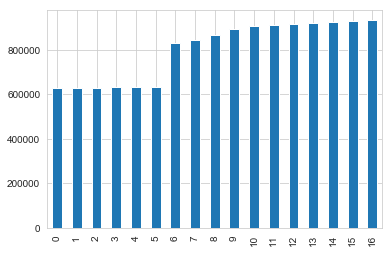

In [152]:
train[['fecha_dato','age']].groupby('fecha_dato',as_index = False).count().rename(columns = {'age':'count'})['count'].plot.bar()

Q. 중간에 사라지는 고객이 있을까?

In [153]:
month_list = list(train[['fecha_dato']].drop_duplicates('fecha_dato')['fecha_dato'])
month_list

['2015-01-28',
 '2015-02-28',
 '2015-03-28',
 '2015-04-28',
 '2015-05-28',
 '2015-06-28',
 '2015-07-28',
 '2015-08-28',
 '2015-09-28',
 '2015-10-28',
 '2015-11-28',
 '2015-12-28',
 '2016-01-28',
 '2016-02-28',
 '2016-03-28',
 '2016-04-28',
 '2016-05-28']

In [154]:
temp = train[['ncodpers']].drop_duplicates('ncodpers')
temp.index = range(len(temp))
temp.shape

(956645, 1)

In [155]:
train["fecha_dato"] = pd.to_datetime(train["fecha_dato"],format="%Y-%m-%d")
train["fecha_alta"] = pd.to_datetime(train["fecha_alta"],format="%Y-%m-%d")
train["fecha_dato"].unique()

array(['2015-01-28T00:00:00.000000000', '2015-02-28T00:00:00.000000000',
       '2015-03-28T00:00:00.000000000', '2015-04-28T00:00:00.000000000',
       '2015-05-28T00:00:00.000000000', '2015-06-28T00:00:00.000000000',
       '2015-07-28T00:00:00.000000000', '2015-08-28T00:00:00.000000000',
       '2015-09-28T00:00:00.000000000', '2015-10-28T00:00:00.000000000',
       '2015-11-28T00:00:00.000000000', '2015-12-28T00:00:00.000000000',
       '2016-01-28T00:00:00.000000000', '2016-02-28T00:00:00.000000000',
       '2016-03-28T00:00:00.000000000', '2016-04-28T00:00:00.000000000',
       '2016-05-28T00:00:00.000000000'], dtype='datetime64[ns]')

In [156]:
train["month"] = pd.DatetimeIndex(train["fecha_dato"]).month
train["age"]   = pd.to_numeric(train["age"], errors="coerce") # coerce : 변환되지 않는 값은 NAN으로 채운다.
train['antiguedad'] = pd.to_numeric(train['antiguedad'],errors="coerce")

In [157]:
train['age'].isna().sum()

27734

In [158]:
train.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1', 'month'],
      dtype='object')

In [159]:
missing = pd.DataFrame(train.isnull().sum()).rename(columns = {0: 'total'})

# Create a percentage missing
missing['percent'] = missing['total'] / len(train)

print(missing.sort_values('percent', ascending = False).head(30))

                          total   percent
conyuemp               13645501  0.999868
ult_fec_cli_1t         13622516  0.998183
renta                   2794375  0.204756
segmento                 189368  0.013876
canal_entrada            186126  0.013638
indrel_1mes              149781  0.010975
tiprel_1mes              149781  0.010975
nomprov                   93591  0.006858
cod_prov                  93591  0.006858
sexo                      27804  0.002037
tipodom                   27735  0.002032
indfall                   27734  0.002032
ind_actividad_cliente     27734  0.002032
indext                    27734  0.002032
indresi                   27734  0.002032
indrel                    27734  0.002032
antiguedad                27734  0.002032
ind_nuevo                 27734  0.002032
fecha_alta                27734  0.002032
age                       27734  0.002032
pais_residencia           27734  0.002032
ind_empleado              27734  0.002032
ind_nom_pens_ult1         16063  0

### age

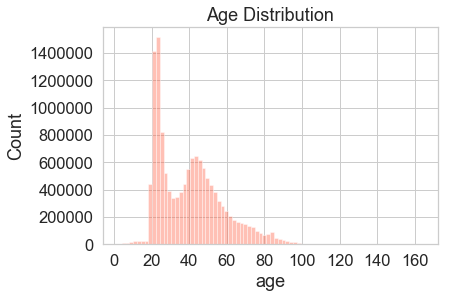

In [160]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(train["age"].dropna(),
                 bins=80,
                 kde=False,
                 color="tomato")
    plt.title("Age Distribution")
    plt.ylabel("Count")

In [161]:
train.loc[train.age < 18,"age"]  = train.loc[(train.age >= 18) & (train.age <= 30),"age"].mean(skipna=True)
train.loc[train.age > 100,"age"] = train.loc[(train.age >= 30) & (train.age <= 100),"age"].mean(skipna=True)
train["age"].fillna(train["age"].mean(),inplace=True)
train["age"]                  = train["age"].astype(int)

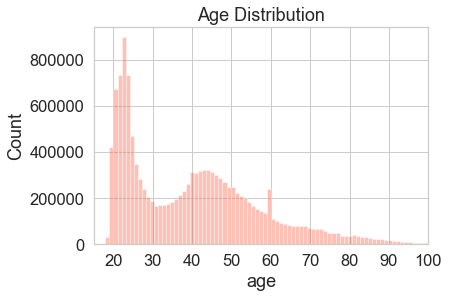

In [162]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(train["age"].dropna(),
                 bins=80,
                 kde=False,
                 color="tomato")
    plt.title("Age Distribution")
    plt.ylabel("Count")
    plt.xlim((15,100))

In [163]:
train['age'].isna().sum()

0

### ind_nuevo

In [164]:
train['ind_nuevo'].value_counts()

0.0    12808368
1.0      811207
Name: ind_nuevo, dtype: int64

In [165]:
train['ind_nuevo'].isna().sum()

27734

In [166]:
train[train['ncodpers'] == 1050741]

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,month
261,2015-01-28,1050741,NaN,NaN,NaN,40,NaT,NaN,NaN,NaN,...,0,0,0,0,0,0,0.0,0.0,0,1
1243130,2015-02-28,1050741,NaN,NaN,NaN,40,NaT,NaN,NaN,NaN,...,0,0,0,0,0,0,NaN,NaN,0,2


In [167]:
train[train['ncodpers'] == 1054432]

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,month
4777,2015-01-28,1054432,NaN,NaN,NaN,40,NaT,NaN,NaN,NaN,...,0,0,0,0,0,0,0.0,0.0,0,1
1251237,2015-02-28,1054432,NaN,NaN,NaN,40,NaT,NaN,NaN,NaN,...,0,0,0,0,0,0,0.0,0.0,0,2
1849334,2015-03-28,1054432,NaN,NaN,NaN,40,NaT,NaN,NaN,NaN,...,0,0,0,0,0,0,0.0,0.0,0,3
2503067,2015-04-28,1054432,NaN,NaN,NaN,40,NaT,NaN,NaN,NaN,...,0,0,0,0,0,0,NaN,NaN,0,4
6051452,2015-09-28,1054432,N,ES,V,40,2012-08-28,1.0,0.0,1.0,...,0,0,0,0,0,0,0.0,0.0,0,9
6494478,2015-10-28,1054432,N,ES,V,40,2012-08-28,1.0,1.0,1.0,...,0,0,0,0,0,0,0.0,0.0,0,10
8096975,2015-11-28,1054432,N,ES,V,40,2012-08-28,1.0,2.0,1.0,...,0,0,0,0,0,0,0.0,0.0,0,11
8204261,2015-12-28,1054432,N,ES,V,40,2012-08-28,1.0,3.0,1.0,...,0,0,0,0,0,0,0.0,0.0,0,12
9898472,2016-01-28,1054432,N,ES,V,40,2012-08-28,1.0,4.0,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
10549971,2016-02-28,1054432,N,ES,V,40,2012-08-28,1.0,5.0,1.0,...,0,0,0,0,0,0,0.0,0.0,0,2


In [168]:
train.loc[train["ind_nuevo"].isnull(),"ind_nuevo"] = 0

In [169]:
train['ind_nuevo'].isna().sum()

0

### antiguedad

In [170]:
train['antiguedad'].isna().sum()

27734

In [171]:
train[key + ['antiguedad']].head()

,fecha_dato,ncodpers,antiguedad
0,2015-01-28,1375586,6.0
1,2015-01-28,1050611,35.0
2,2015-01-28,1050612,35.0
3,2015-01-28,1050613,35.0
4,2015-01-28,1050614,35.0


In [172]:
train['antiguedad'].describe()

count    1.361958e+07
mean     7.659194e+01
std      1.671807e+03
min     -9.999990e+05
25%      2.300000e+01
50%      5.000000e+01
75%      1.350000e+02
max      2.560000e+02
Name: antiguedad, dtype: float64

In [175]:
train[train['antiguedad'] < 0].shape

(38, 49)

In [176]:
train.loc[train.antiguedad <0, "antiguedad"] = 0

In [177]:
train['antiguedad'].isna().sum()

27734

In [178]:
# 정상 고객
train[train['ncodpers'] == 1375586]

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,month
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6.0,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
1047196,2015-02-28,1375586,N,ES,H,35,2015-01-12,0.0,6.0,1.0,...,0,0,0,0,0,0,0.0,0.0,0,2
1681276,2015-03-28,1375586,N,ES,H,35,2015-01-12,0.0,6.0,1.0,...,0,0,0,0,0,0,0.0,0.0,0,3
2299297,2015-04-28,1375586,N,ES,H,35,2015-01-12,0.0,6.0,1.0,...,0,0,0,0,0,0,0.0,0.0,0,4
2714121,2015-05-28,1375586,N,ES,H,35,2015-01-12,0.0,6.0,1.0,...,0,0,0,0,0,0,0.0,0.0,1,5
3343336,2015-06-28,1375586,N,ES,H,35,2015-01-12,0.0,6.0,1.0,...,0,0,0,0,0,0,0.0,0.0,1,6
4581564,2015-07-28,1375586,N,ES,H,35,2015-01-12,0.0,6.0,1.0,...,0,0,0,0,0,0,0.0,0.0,1,7
5075380,2015-08-28,1375586,N,ES,H,36,2015-01-12,0.0,7.0,1.0,...,0,0,0,0,0,0,0.0,0.0,0,8
6258167,2015-09-28,1375586,N,ES,H,36,2015-01-12,0.0,8.0,1.0,...,0,0,0,0,0,0,0.0,0.0,0,9
6572487,2015-10-28,1375586,N,ES,H,36,2015-01-12,0.0,9.0,1.0,...,0,0,0,0,0,0,0.0,0.0,0,10


In [179]:
train.loc[train["antiguedad"].isnull(),:].groupby("ncodpers", sort=False).size().head()

ncodpers
1050741    2
1051017    2
1051064    4
1051387    3
1048660    5
dtype: int64

In [180]:
# antiguedad == na 인 고객
train[train['ncodpers'] == 1051064]

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,month
1063,2015-01-28,1051064,NaN,NaN,NaN,40,NaT,0.0,NaN,NaN,...,0,0,0,0,0,0,0.0,0.0,0,1
1243712,2015-02-28,1051064,NaN,NaN,NaN,40,NaT,0.0,NaN,NaN,...,0,0,0,0,0,0,0.0,0.0,0,2
1848166,2015-03-28,1051064,NaN,NaN,NaN,40,NaT,0.0,NaN,NaN,...,0,0,0,0,0,0,0.0,0.0,0,3
2506527,2015-04-28,1051064,NaN,NaN,NaN,40,NaT,0.0,NaN,NaN,...,0,0,0,0,0,0,NaN,NaN,0,4


In [140]:
# antiguedad == na 인 고객
train[train['ncodpers'] == 435837]

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,month
3086280,2015-05-28,435837,NaN,NaN,NaN,40,NaT,0.0,NaN,NaN,...,0,1,0,0,0,0,NaN,NaN,0,5


In [188]:
train.loc[train["antiguedad"].isnull(),['fecha_dato','ncodpers']].groupby("ncodpers", sort=False).min()['fecha_dato'].value_counts()

2015-01-28    6953
2015-02-28     166
2015-03-28      89
2015-05-28      72
2015-04-28      57
2015-06-28       3
Name: fecha_dato, dtype: int64

In [190]:
train[train['antiguedad'].isna()].isna().sum()

fecha_dato                   0
ncodpers                     0
ind_empleado             27734
pais_residencia          27734
sexo                     27734
age                          0
fecha_alta               27734
ind_nuevo                    0
antiguedad               27734
indrel                   27734
ult_fec_cli_1t           27734
indrel_1mes              27734
tiprel_1mes              27734
indresi                  27734
indext                   27734
conyuemp                 27734
canal_entrada            27734
indfall                  27734
tipodom                  27734
cod_prov                 27734
nomprov                  27734
ind_actividad_cliente    27734
renta                    27734
segmento                 27734
ind_ahor_fin_ult1            0
ind_aval_fin_ult1            0
ind_cco_fin_ult1             0
ind_cder_fin_ult1            0
ind_cno_fin_ult1             0
ind_ctju_fin_ult1            0
ind_ctma_fin_ult1            0
ind_ctop_fin_ult1            0
ind_ctpp

In [191]:
train['warning'] = 0
train.loc[train['antiguedad'].isna(),'warning'] = 1

In [194]:
train[train['warning'] == 1].head()
# 비교적 과거데이터에서 일어나는 특성.
# na값들을 섣불리 채우기 어려워 보임.
# 차라리 분석대상에서 제외하는것이 나아보임.

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,month,warning
261,2015-01-28,1050741,NaN,NaN,NaN,40,NaT,0.0,NaN,NaN,...,0,0,0,0,0,0.0,0.0,0,1,1
1029,2015-01-28,1051017,NaN,NaN,NaN,40,NaT,0.0,NaN,NaN,...,0,0,0,0,0,0.0,0.0,0,1,1
1063,2015-01-28,1051064,NaN,NaN,NaN,40,NaT,0.0,NaN,NaN,...,0,0,0,0,0,0.0,0.0,0,1,1
1154,2015-01-28,1051387,NaN,NaN,NaN,40,NaT,0.0,NaN,NaN,...,0,0,0,0,0,0.0,0.0,0,1,1
1779,2015-01-28,1048660,NaN,NaN,NaN,40,NaT,0.0,NaN,NaN,...,0,0,0,0,0,0.0,0.0,0,1,1


In [196]:
train.loc[train["antiguedad"].isnull(),"antiguedad"] = 0

In [197]:
train['antiguedad'].isna().sum()

0

In [198]:
train.shape

(13647309, 50)

In [201]:
train = train[train['warning'] == 0]

In [202]:
train.shape

(13619575, 50)

In [204]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [205]:
missing = pd.DataFrame(train.isnull().sum()).rename(columns = {0: 'total'})

# Create a percentage missing
missing['percent'] = missing['total'] / len(train)

print(missing.sort_values('percent', ascending = False).head(30))

                      total  percent
conyuemp           13617767    1.000
ult_fec_cli_1t     13594782    0.998
renta               2766641    0.203
segmento             161634    0.012
canal_entrada        158392    0.012
tiprel_1mes          122047    0.009
indrel_1mes          122047    0.009
nomprov               65857    0.005
cod_prov              65857    0.005
ind_nom_pens_ult1       217    0.000
ind_nomina_ult1         217    0.000
sexo                     70    0.000
tipodom                   1    0.000
ind_ecue_fin_ult1         0    0.000
ind_dela_fin_ult1         0    0.000
ind_hip_fin_ult1          0    0.000
ind_deme_fin_ult1         0    0.000
ind_deco_fin_ult1         0    0.000
ind_fond_fin_ult1         0    0.000
fecha_dato                0    0.000
ind_plan_fin_ult1         0    0.000
ind_ctop_fin_ult1         0    0.000
ind_pres_fin_ult1         0    0.000
ind_reca_fin_ult1         0    0.000
ind_tjcr_fin_ult1         0    0.000
ind_valo_fin_ult1         0    0.000
i

In [207]:
train['tipodom'].value_counts()

1.000    13619574
Name: tipodom, dtype: int64

In [210]:
train = train.drop(["tipodom","cod_prov"],axis=1)
# cod_prov 는 nomprov와 같은 의미를 같은 columns

In [215]:
train = train.drop(["conyuemp","ult_fec_cli_1t"],axis=1)
# 이 두 변수는 na가 너무 많음.

In [211]:
train.nomprov.unique()


array(['MALAGA', 'CIUDAD REAL', 'ZARAGOZA', 'TOLEDO', 'LEON', 'GIPUZKOA',
       'CACERES', 'GIRONA', 'ZAMORA', 'BARCELONA', 'SALAMANCA', 'BURGOS',
       'HUESCA', 'NAVARRA', 'AVILA', 'SEGOVIA', 'LUGO', 'LERIDA',
       'MADRID', 'ALICANTE', 'SORIA', 'SEVILLA', 'CANTABRIA',
       'BALEARS, ILLES', 'VALLADOLID', 'PONTEVEDRA', 'VALENCIA', 'TERUEL',
       'CORUÑA, A', 'OURENSE', 'JAEN', 'CUENCA', 'BIZKAIA', 'CASTELLON',
       'RIOJA, LA', 'ALBACETE', 'BADAJOZ', 'MURCIA', 'CADIZ', 'ALMERIA',
       'GUADALAJARA', 'PALENCIA', 'PALMAS, LAS', 'CORDOBA', 'HUELVA',
       'GRANADA', 'ASTURIAS', 'SANTA CRUZ DE TENERIFE', 'MELILLA',
       'TARRAGONA', 'ALAVA', nan, 'CEUTA'], dtype=object)

In [212]:
train.loc[train.nomprov=="CORU\xc3\x91A, A","nomprov"] = "CORUNA, A"


In [213]:
train.loc[train.nomprov.isnull(),"nomprov"] = "UNKNOWN"


In [216]:
missing = pd.DataFrame(train.isnull().sum()).rename(columns = {0: 'total'})

# Create a percentage missing
missing['percent'] = missing['total'] / len(train)

print(missing.sort_values('percent', ascending = False).head(30))

                     total  percent
renta              2766641    0.203
segmento            161634    0.012
canal_entrada       158392    0.012
indrel_1mes         122047    0.009
tiprel_1mes         122047    0.009
ind_nom_pens_ult1      217    0.000
ind_nomina_ult1        217    0.000
sexo                    70    0.000
fecha_dato               0    0.000
ind_hip_fin_ult1         0    0.000
ind_ctpp_fin_ult1        0    0.000
ind_deco_fin_ult1        0    0.000
ind_deme_fin_ult1        0    0.000
ind_dela_fin_ult1        0    0.000
ind_ecue_fin_ult1        0    0.000
ind_fond_fin_ult1        0    0.000
ind_pres_fin_ult1        0    0.000
ind_plan_fin_ult1        0    0.000
ind_ctma_fin_ult1        0    0.000
ind_reca_fin_ult1        0    0.000
ind_tjcr_fin_ult1        0    0.000
ind_valo_fin_ult1        0    0.000
ind_viv_fin_ult1         0    0.000
ind_recibo_ult1          0    0.000
month                    0    0.000
ind_ctop_fin_ult1        0    0.000
ind_cder_fin_ult1        0  

### renta

In [214]:
train['renta'].isna().sum()

2766641

In [218]:
# 나라별 소득의 중앙값으로 na를 대체하자.

In [224]:
renta_median = train[['nomprov','renta']].groupby('nomprov',as_index = False).median().rename(columns = {'renta' : 'renta_median'})


In [226]:
train = pd.merge(train,renta_median,how='left',on='nomprov')


In [231]:
train.loc[~train['renta'].isna(),'renta_median'] = 0

In [232]:
train.loc[train['renta'].isna(),'renta'] = 0

In [233]:
train['renta'] = train['renta'] + train['renta_median']

In [234]:
train['renta'].isna().sum()

0

In [258]:
train = train.drop('renta_median',axis=1)

In [236]:
missing = pd.DataFrame(train.isnull().sum()).rename(columns = {0: 'total'})

# Create a percentage missing
missing['percent'] = missing['total'] / len(train)

print(missing.sort_values('percent', ascending = False).head(10))

                    total  percent
segmento           161634    0.012
canal_entrada      158392    0.012
indrel_1mes        122047    0.009
tiprel_1mes        122047    0.009
ind_nom_pens_ult1     217    0.000
ind_nomina_ult1       217    0.000
sexo                   70    0.000
fecha_dato              0    0.000
ind_plan_fin_ult1       0    0.000
ind_ctpp_fin_ult1       0    0.000


In [237]:
train.loc[train.ind_nomina_ult1.isnull(), "ind_nomina_ult1"] = 0
train.loc[train.ind_nom_pens_ult1.isnull(), "ind_nom_pens_ult1"] = 0

In [238]:
train.sexo.value_counts()

V    7424252
H    6195253
Name: sexo, dtype: int64

In [239]:
train.loc[train['sexo'].isna(),'sexo'] = 'V'

In [240]:
train.segmento.value_counts()

02 - PARTICULARES     7960220
03 - UNIVERSITARIO    4935579
01 - TOP               562142
Name: segmento, dtype: int64

In [241]:
train.loc[train['segmento'].isna(),'segmento'] = 'UNKNOWN'

In [243]:
train.canal_entrada.value_counts().head()

KHE    4055270
KAT    3268209
KFC    3098360
KHQ     591039
KFA     409669
Name: canal_entrada, dtype: int64

In [244]:
train.loc[train['canal_entrada'].isna(),'canal_entrada'] = 'UNKNOWN'

In [246]:
train.indrel_1mes.value_counts()

1.0    9133383
1      4357298
3.0       2780
3         1570
P          874
2.0        740
2          577
4.0        223
4           83
Name: indrel_1mes, dtype: int64

In [247]:
map_dict = { 1.0  : "1",
            "1.0" : "1",
            "1"   : "1",
            "3.0" : "3",
            "P"   : "P",
            3.0   : "3",
            2.0   : "2",
            "3"   : "3",
            "2.0" : "2",
            "4.0" : "4",
            "4"   : "4",
            "2"   : "2"}

In [248]:
train.indrel_1mes.fillna("P",inplace=True)
train.indrel_1mes = train.indrel_1mes.apply(lambda x: map_dict.get(x,x))
train.indrel_1mes = train.indrel_1mes.astype("str")


In [249]:
train.indrel_1mes.value_counts()

1    13490681
P      122921
3        4350
2        1317
4         306
Name: indrel_1mes, dtype: int64

In [250]:
train.tiprel_1mes.value_counts()

I    7304875
A    6187123
P       4656
R        870
N          4
Name: tiprel_1mes, dtype: int64

In [251]:
train.loc[train['tiprel_1mes'].isna(),'tiprel_1mes'] = 'N'

In [252]:
missing = pd.DataFrame(train.isnull().sum()).rename(columns = {0: 'total'})

# Create a percentage missing
missing['percent'] = missing['total'] / len(train)

print(missing.sort_values('percent', ascending = False).head(10))

                   total  percent
fecha_dato             0    0.000
ind_plan_fin_ult1      0    0.000
ind_ctma_fin_ult1      0    0.000
ind_ctop_fin_ult1      0    0.000
ind_ctpp_fin_ult1      0    0.000
ind_deco_fin_ult1      0    0.000
ind_deme_fin_ult1      0    0.000
ind_dela_fin_ult1      0    0.000
ind_ecue_fin_ult1      0    0.000
ind_fond_fin_ult1      0    0.000


In [262]:
train = train.drop('warning',axis=1)

In [263]:
train.shape

(13619575, 45)

In [264]:
train.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,month
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.000,6.000,1.000,...,0,0,0,0,0,0,0.000,0.000,0,1
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.000,35.000,1.000,...,0,0,0,0,0,0,0.000,0.000,0,1
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.000,35.000,1.000,...,0,0,0,0,0,0,0.000,0.000,0,1
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.000,35.000,1.000,...,0,0,0,0,0,0,0.000,0.000,0,1
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.000,35.000,1.000,...,0,0,0,0,0,0,0.000,0.000,0,1
